In [1]:
import imageio
import matplotlib.pyplot as plt

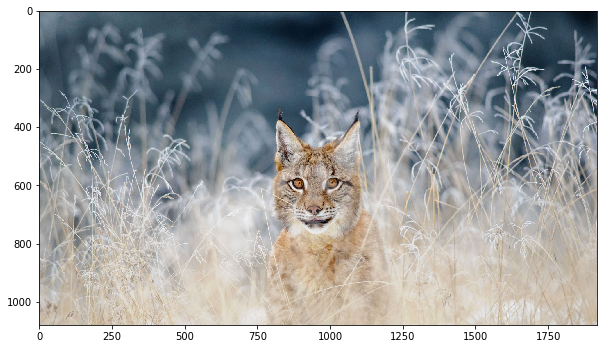

In [43]:
pic = imageio.imread('D:/data_files/WinterLynx.jpg')
plt.figure(figsize=(10,10))

plt.imshow(pic)
plt.show()

In [3]:
print('Type of the image :', type(pic))
print()
print('Shape of the image: {}'.format(pic.shape))
print('Image Hight {}'.format(pic.shape[0]))
print('Image Width {}'.format(pic.shape[1]))
print('Dimension of Image {}'.format(pic.ndim))

Type of the image : <class 'imageio.core.util.Array'>

Shape of the image: (1080, 1920, 3)
Image Hight 1080
Image Width 1920
Dimension of Image 3


In [4]:
print('Image size {}'.format(pic.size))
print('Maximum RGB value in this image {}'.format(pic.max()))
print('Minimum RGB value in this image {}'.format(pic.min()))

Image size 6220800
Maximum RGB value in this image 255
Minimum RGB value in this image 0


In [6]:
pic[100, 50]
# R = 67, G = 89, B = 103  RGB

Array([ 67,  89, 103], dtype=uint8)

In [7]:
# 在OpenCV中，Images并不是按照RGB顺序，而是BGR。
# imageio.imread将图像加载为RGB，但OpenCV假定是BGR
print('Value of only R channel {}'.format(pic[100,50,0]))
print('Value of only R channel {}'.format(pic[100,50,1]))
print('Value of only R channel {}'.format(pic[100,50,2]))

Value of only R channel 67
Value of only R channel 89
Value of only R channel 103


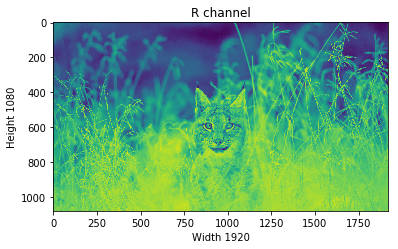

In [11]:
plt.title('R channel')
plt.ylabel('Height {}'.format(pic.shape[0]))
plt.xlabel('Width {}'.format(pic.shape[1]))
plt.imshow(pic[:,:,0])
plt.show()

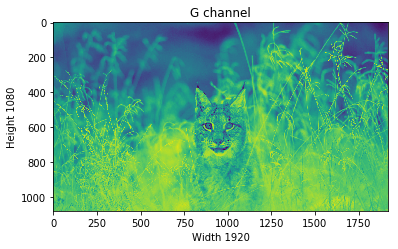

In [12]:
plt.title('G channel')
plt.ylabel('Height {}'.format(pic.shape[0]))
plt.xlabel('Width {}'.format(pic.shape[1]))
plt.imshow(pic[:,:,1])
plt.show()

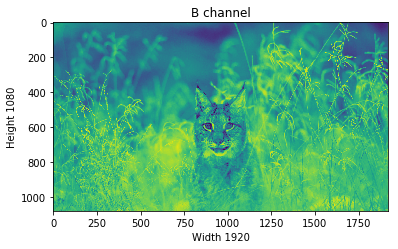

In [13]:
plt.title('B channel')
plt.ylabel('Height {}'.format(pic.shape[0]))
plt.xlabel('Width {}'.format(pic.shape[1]))
plt.imshow(pic[:,:,2])
plt.show()

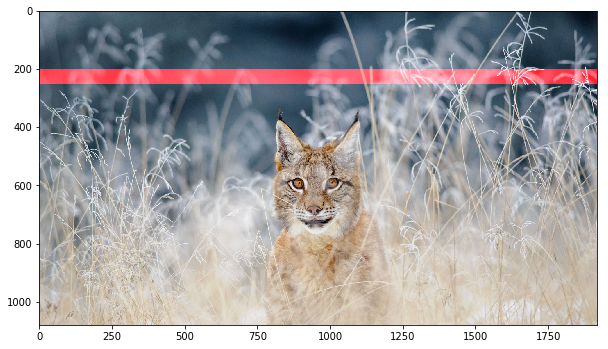

In [26]:
pic = imageio.imread('D:/data_files/WinterLynx.jpg')
pic[200:250, :, 0] = 255
plt.figure(figsize = (10,10))
plt.imshow(pic)
plt.show()

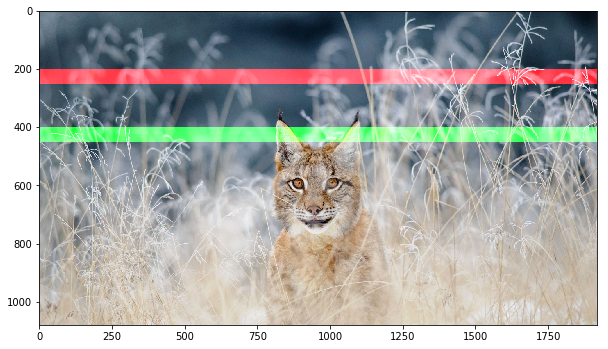

In [27]:
pic[400:450, :, 1] = 255
plt.figure(figsize = (10,10))
plt.imshow(pic)
plt.show()

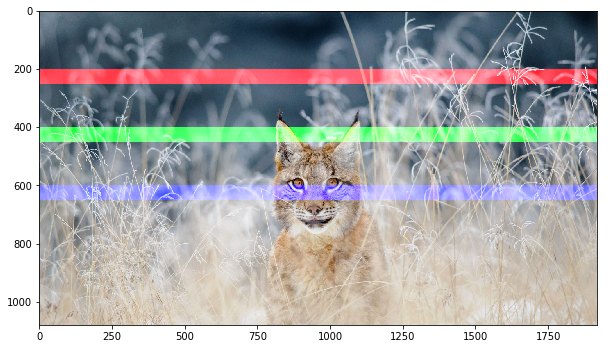

In [28]:
pic[600:650, :, 2] = 255
plt.figure(figsize = (10,10))
plt.imshow(pic)
plt.show()

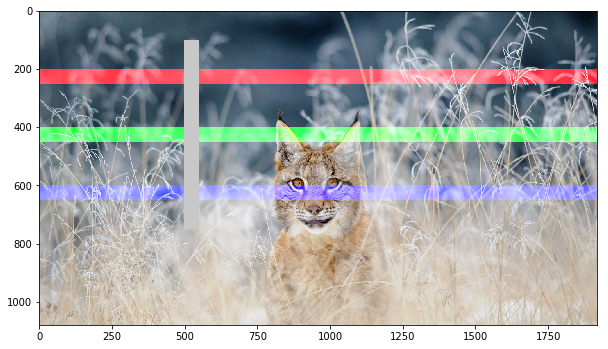

In [29]:
pic[100:750, 500:550, [0, 1, 2] ] = 200
plt.figure(figsize = (10,10))
plt.imshow(pic)
plt.show()

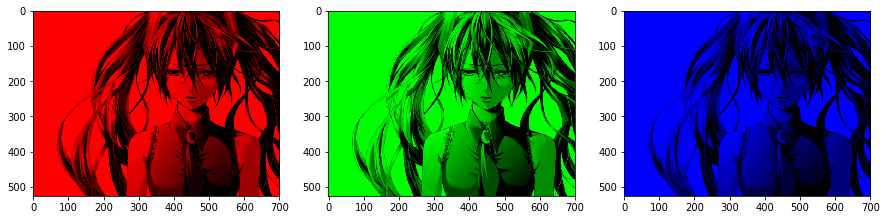

In [20]:
import numpy as np

pic = imageio.imread('D:/data_files/bili04.jpg')

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
for c, ax in zip(range(3),ax):
    split_img = np.zeros(pic.shape, dtype="uint8")
    split_img[:,:,c] = pic[:,:,c]
    ax.imshow(split_img)

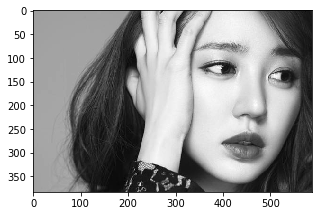

In [15]:
'''
在python中有两种方法可以将图像转换为灰度，但使用matplotlib的
简单方法是使用此公式获取原始图像的RGB值的加权平均值。
'''
import numpy as np
gravity= np.array([0.299,0.587,0.114])
pic = imageio.imread('D:/data_files/hot03.jpg')
#三原色对应的权重值
rgb_weight = [0.299, 0.587, 0.114]

#对ndarray数据进行加权平均值操作(矩阵积操作)
img_weight = np.dot(pic, rgb_weight)

#显示加权平均值后的图片
plt.figure(figsize = (5,5))
plt.imshow(img_weight, cmap="gray")

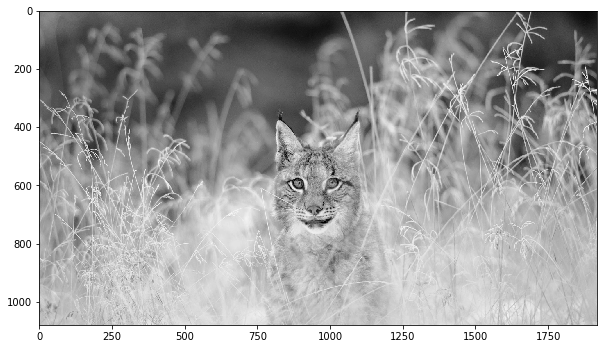

Type of the image : <class 'imageio.core.util.Array'>

Shape of the image : (1080, 1920)
Image Hight 1080
Image Width 1920
Dimension of Image 2

Image size 2073600
Maximum RGB value in this image 251.85
Minimum RGB value in this image 0.14
Random indexes [x,y] : 85.36000000000001


In [42]:
'''
GIMP将颜色转换为灰度图像软件有三种算法来完成任务:
1灰度的Lightness 等级计算为: 
Lightness = ½ × (max(R,G,B) + min(R,G,B)) 
2灰度的Luminosity 等级计算为: 
Luminosity = 0.21 × R + 0.72 × G + 0.07 × B 
3灰度的Average 计算为: 
Average Brightness = (R + G + B) ÷ 3
'''
pic = imageio.imread('D:/data_files/WinterLynx.jpg')
gray = lambda rgb:np.dot(rgb[...,:3],[0.21,0.72,0.07])
gray = gray(pic)
plt.figure(figsize=(10,10))
plt.imshow(gray, cmap = plt.get_cmap(name='gray'))
plt.show()

print('Type of the image :', type(gray))
print()
print('Shape of the image : {}'.format(gray.shape))
print('Image Hight {}'.format(gray.shape[0]))
print('Image Width {}'.format(gray.shape[1]))
print('Dimension of Image {}'.format(gray.ndim))
print()
print('Image size {}'.format(gray.size))
print('Maximum RGB value in this image {}'.format(gray.max()))
print('Minimum RGB value in this image {}'.format(gray.min()))
print('Random indexes [x,y] : {}'.format(gray[100,50]))

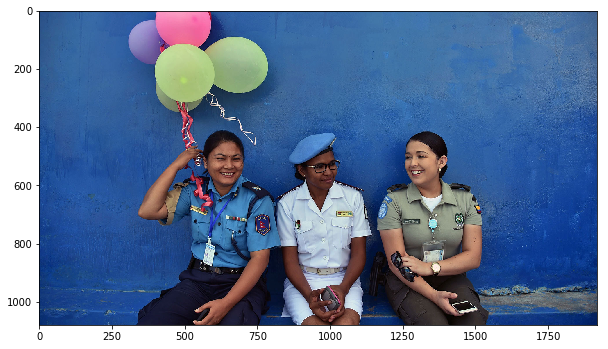

In [44]:
pic = imageio.imread('D:/data_files/Policewomen.jpg')
plt.figure(figsize=(10,10))

plt.imshow(pic)
plt.show()

In [45]:
import random
low_pixel = pic < 20
if low_pixel.any() == True:
    print(low_pixel.shape)

(1080, 1920, 3)


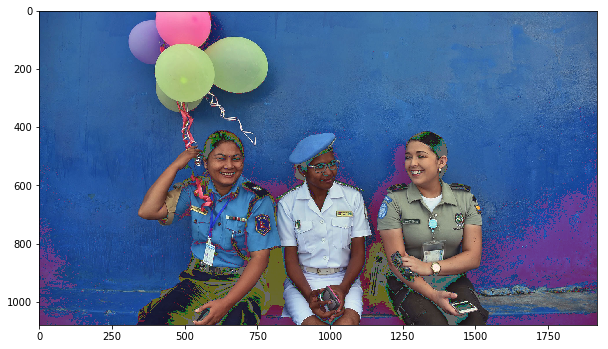

In [47]:
pic[low_pixel] = random.randint(25, 225)

plt.figure(figsize=(10,10))
plt.imshow(pic)
plt.show()

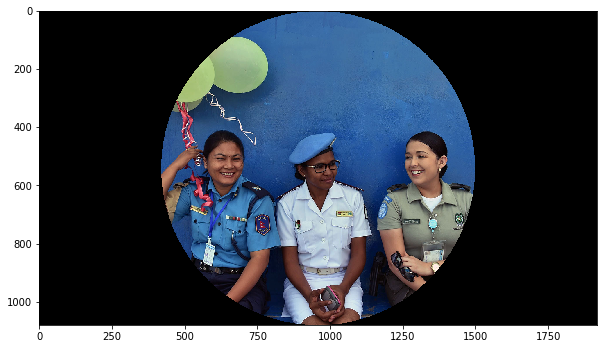

In [48]:
pic = imageio.imread('D:/data_files/Policewomen.jpg')
total_row , total_col , layers = pic.shape 
x , y = np.ogrid[:total_row , :total_col]  
# get the center values of the image  
cen_x , cen_y = total_row/2 , total_col/2  
distance_from_the_center = np.sqrt((x-cen_x)**2 + (y-cen_y)**2)  
# Select convenient radius value  
radius = (total_row/2)  
# Using logical operator '>'  
circular_pic = distance_from_the_center > radius
pic[circular_pic] = 0  

plt.figure(figsize = (10,10))  
plt.imshow(pic)  
plt.show()